In [75]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin

In [77]:
#Array's met de meetingen
N1 = np.array([0.5,2.75,6.5,12.5,18.5,25.5,33.5,44,55.5,68.25,83.5,98.25,117.5,136.5,157.5])
N2 = np.array([1,3.25,6.5,11.25,17.25,24.5,33,44,55,69,84.5,100,118.5,136.75,157.75])
N3 = np.array([0.75,2.75,6.25,11.25,18.25,25.75,34.25,44.75,56.25,70.25,85.25,102,118.25,138,157.75])
Ntot = np.array([0.75,2.917,6.417,11.67,18,25.25,33.58,44.25,55.58,69.17,84.42,100.08,118.08,137.08,157.67])

In [78]:
#Dikte van het glas plaatje en de golf lengte definiëren
d = 1.0e-3
lamda = 632.8e-9

In [93]:
#Invals hoek definiëren
i2 =  np.linspace(2,30,15)
i = np.pi/180* i2
I = np.ndarray.tolist(i2)

In [80]:
#Functie maken om de fout in de trendlijn te berekenen
def FoutInTrendlijnBrekenen(N, N_data): 
    teller=0
    fout = []
    for data in i2:
        if data in I:
            index = I.index(data)
            fout.append((N_data[teller] - N[index])**2)
            teller+=1
    totaal_fout =  sum(fout)
    return totaal_fout

In [81]:
#lijst maken met verschillende brekingsindexen
n_lijst = np.linspace(1,2,500)

#Een lijst aan maken waar de fouten in genoteerd kunnen worden
totalen_fouten_tot = []

#Fout berekenen voor verschillende brekingsindexen
for n in n_lijst:
    N = 2*d/lamda*((n/np.cos(np.sin(i)/n))+np.tan(i)*np.sin(i)-np.tan(np.sin(i)/n)*np.sin(i)-(n-1)-(1/np.cos(i)))
    totalen_fouten_tot.append(FoutInTrendlijnBrekenen(N, Ntot))

Text(0, 0.5, 'Fouten [$-$]')

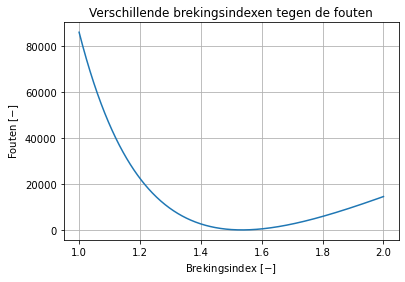

In [91]:
#Fouten uit plotten tegen brekingsindexen
plt.plot(n_lijst, totalen_fouten_tot)
plt.grid()
plt.title('Verschillende brekingsindexen tegen de fouten')
plt.xlabel('Brekingsindex [$-$]')
plt.ylabel('Fouten [$-$]')

In [83]:
#brekings index met kleinste fout uit de lijst halen
mini_tot = min(totalen_fouten_tot)
mi_tot = totalen_fouten_tot.index(mini_tot)
print(n_lijst[mi_tot])

1.535070140280561


In [96]:
#berekenen van error
Nerr = 1
ierr = 0.5
b = np.array(i2)
j = b*np.pi/180
N_tot = 2*d/lamda*((n/np.cos(np.sin(j)/n))+np.tan(j)*np.sin(j)-np.tan(np.sin(j)/n)*np.sin(j)-(n-1)-(1/np.cos(j)))
corr_matrix = np.corrcoef(Ntot, N_tot)
corr =  corr_matrix[0,1]
R_kwadraat = corr**2
print(round(R_kwadraat,4))

0.9998


In [87]:
#Standaarddeviatie berekenen van de y-as
standaarddeviatie = np.zeros(15)
for n in range(15):
    std = np.std([N1[n],N2[n],N3[n]])
    standaarddeviatie[n] = np.sqrt(std/Ntot[n]**2+(0.15/Ntot[n])**2)

<ErrorbarContainer object of 3 artists>

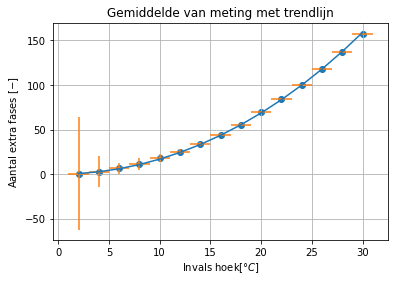

In [92]:
#Het plotten van de metingen tegen de invals hoek
plt.scatter(i2, Ntot)
plt.grid()
plt.xlabel('Invals hoek[$°C$]')
plt.ylabel('Aantal extra fases [$-$]')
plt.title("Gemiddelde van meting met trendlijn")

#Aantal extra fases berekenen met de brekingsidex
ntot = n_lijst[mi_tot]
N__tot = 2*d/lamda*((ntot/np.cos(np.sin(i)/ntot))+np.tan(i)*np.sin(i)-np.tan(np.sin(i)/ntot)*np.sin(i)-(ntot-1)-(1/np.cos(i)))

#Het plotten van de extra fassen tegen de invals hoek, met de foutbalken
plt.plot(i2, N__tot)
plt.errorbar(i2, Ntot, xerr=0.1*10, yerr=standaarddeviatie*100, fmt="none")